In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义位置映射字典
location_mapping = {1: 'Wanliu', 2: 'Suzhouqiao', 3: 'Beitaipingzhuang', 4: 'Shijicheng'}

# 读取售价数据
house_data = pd.read_excel(r'C:\Users\邓双贤\Desktop\HW3数据\house_data.xlsx')
# 映射 location 列
house_data['location'] = house_data['location'].map(location_mapping)

# 读取租金数据
rent_data = pd.read_excel(r'C:\Users\邓双贤\Desktop\HW3数据\rent_data.xlsx')
# 映射 location 列
rent_data['location'] = rent_data['location'].map(location_mapping)

In [2]:
# 按街区描述售价数据
grouped_house = house_data.groupby('location')
for location, group in grouped_house:
    print(f"House price data - Description of {location} block:")
    print(group.describe())
    print("\n")

House price data - Description of Beitaipingzhuang block:
             area       price/m2
count   64.000000      64.000000
mean    68.413125   91334.953125
std     17.252247   13720.463161
min     33.150000   74409.000000
25%     54.130000   79258.500000
50%     63.510000   89461.500000
75%     82.630000   99684.000000
max    109.530000  130264.000000


House price data - Description of Shijicheng block:
              area       price/m2
count  1140.000000    1140.000000
mean    167.457991  123560.652632
std      44.612663   19290.421479
min      51.880000   82883.000000
25%     136.170000  106818.000000
50%     165.470000  124553.000000
75%     192.780000  136363.000000
max     334.920000  216666.000000


House price data - Description of Suzhouqiao block:
             area       price/m2
count  114.000000     114.000000
mean    98.914386   85697.192982
std     55.819587   10910.884267
min     40.170000   52362.000000
25%     60.310000   78401.000000
50%     81.550000   86713.000000


In [3]:
# 按街区描述租金数据
grouped_rent = rent_data.groupby('location')
for location, group in grouped_rent:
    print(f"Rent data - Description of {location} block:")
    print(group.describe())
    print("\n")

Rent data - Description of Beitaipingzhuang block:
             area    rent_price
count   53.000000     53.000000
mean    59.509434   8509.433962
std     23.906567   3520.503906
min     20.000000   2800.000000
25%     37.000000   5500.000000
50%     57.000000   7800.000000
75%     76.000000  11700.000000
max    109.000000  15500.000000


Rent data - Description of Shijicheng block:
              area    rent_price
count  1140.000000   1140.000000
mean    157.468421  19949.868421
std      46.090893  10074.845155
min      38.000000   5400.000000
25%     134.000000  14500.000000
50%     165.000000  18000.000000
75%     178.000000  23000.000000
max     296.000000  59000.000000


Rent data - Description of Suzhouqiao block:
             area    rent_price
count  198.000000    198.000000
mean    56.212121   8137.550505
std     24.758026   3784.018650
min      6.000000   2000.000000
25%     44.000000   6200.000000
50%     60.000000   7800.000000
75%     68.000000   8925.000000
max    151.000

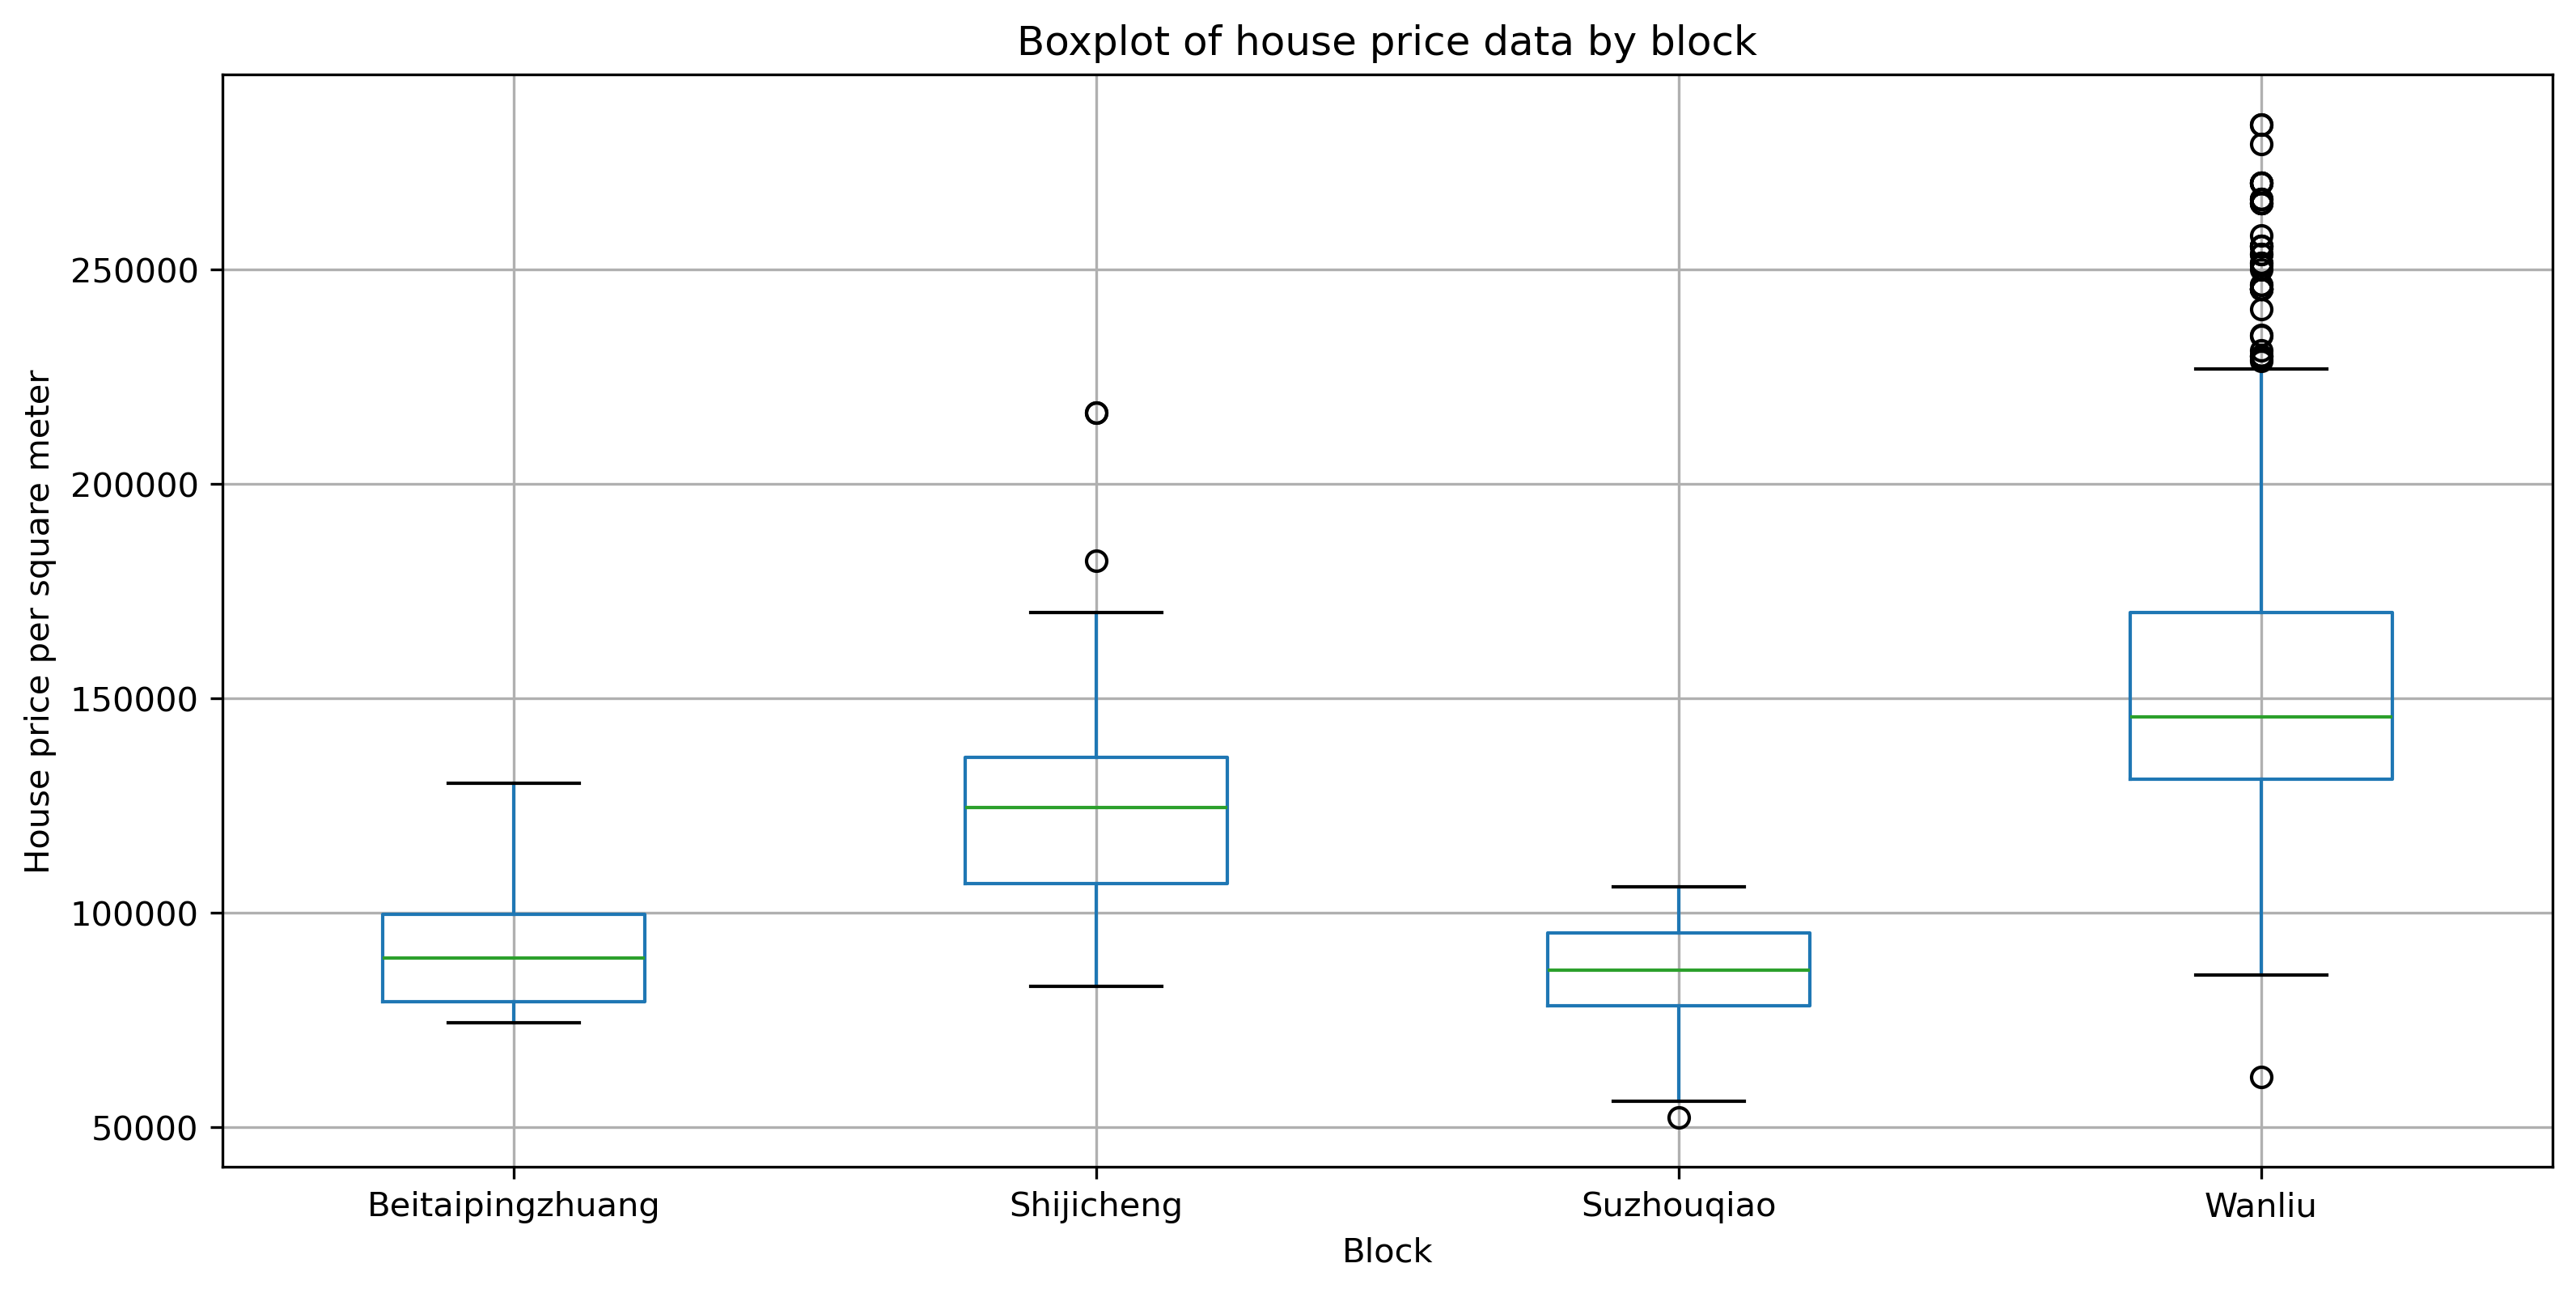

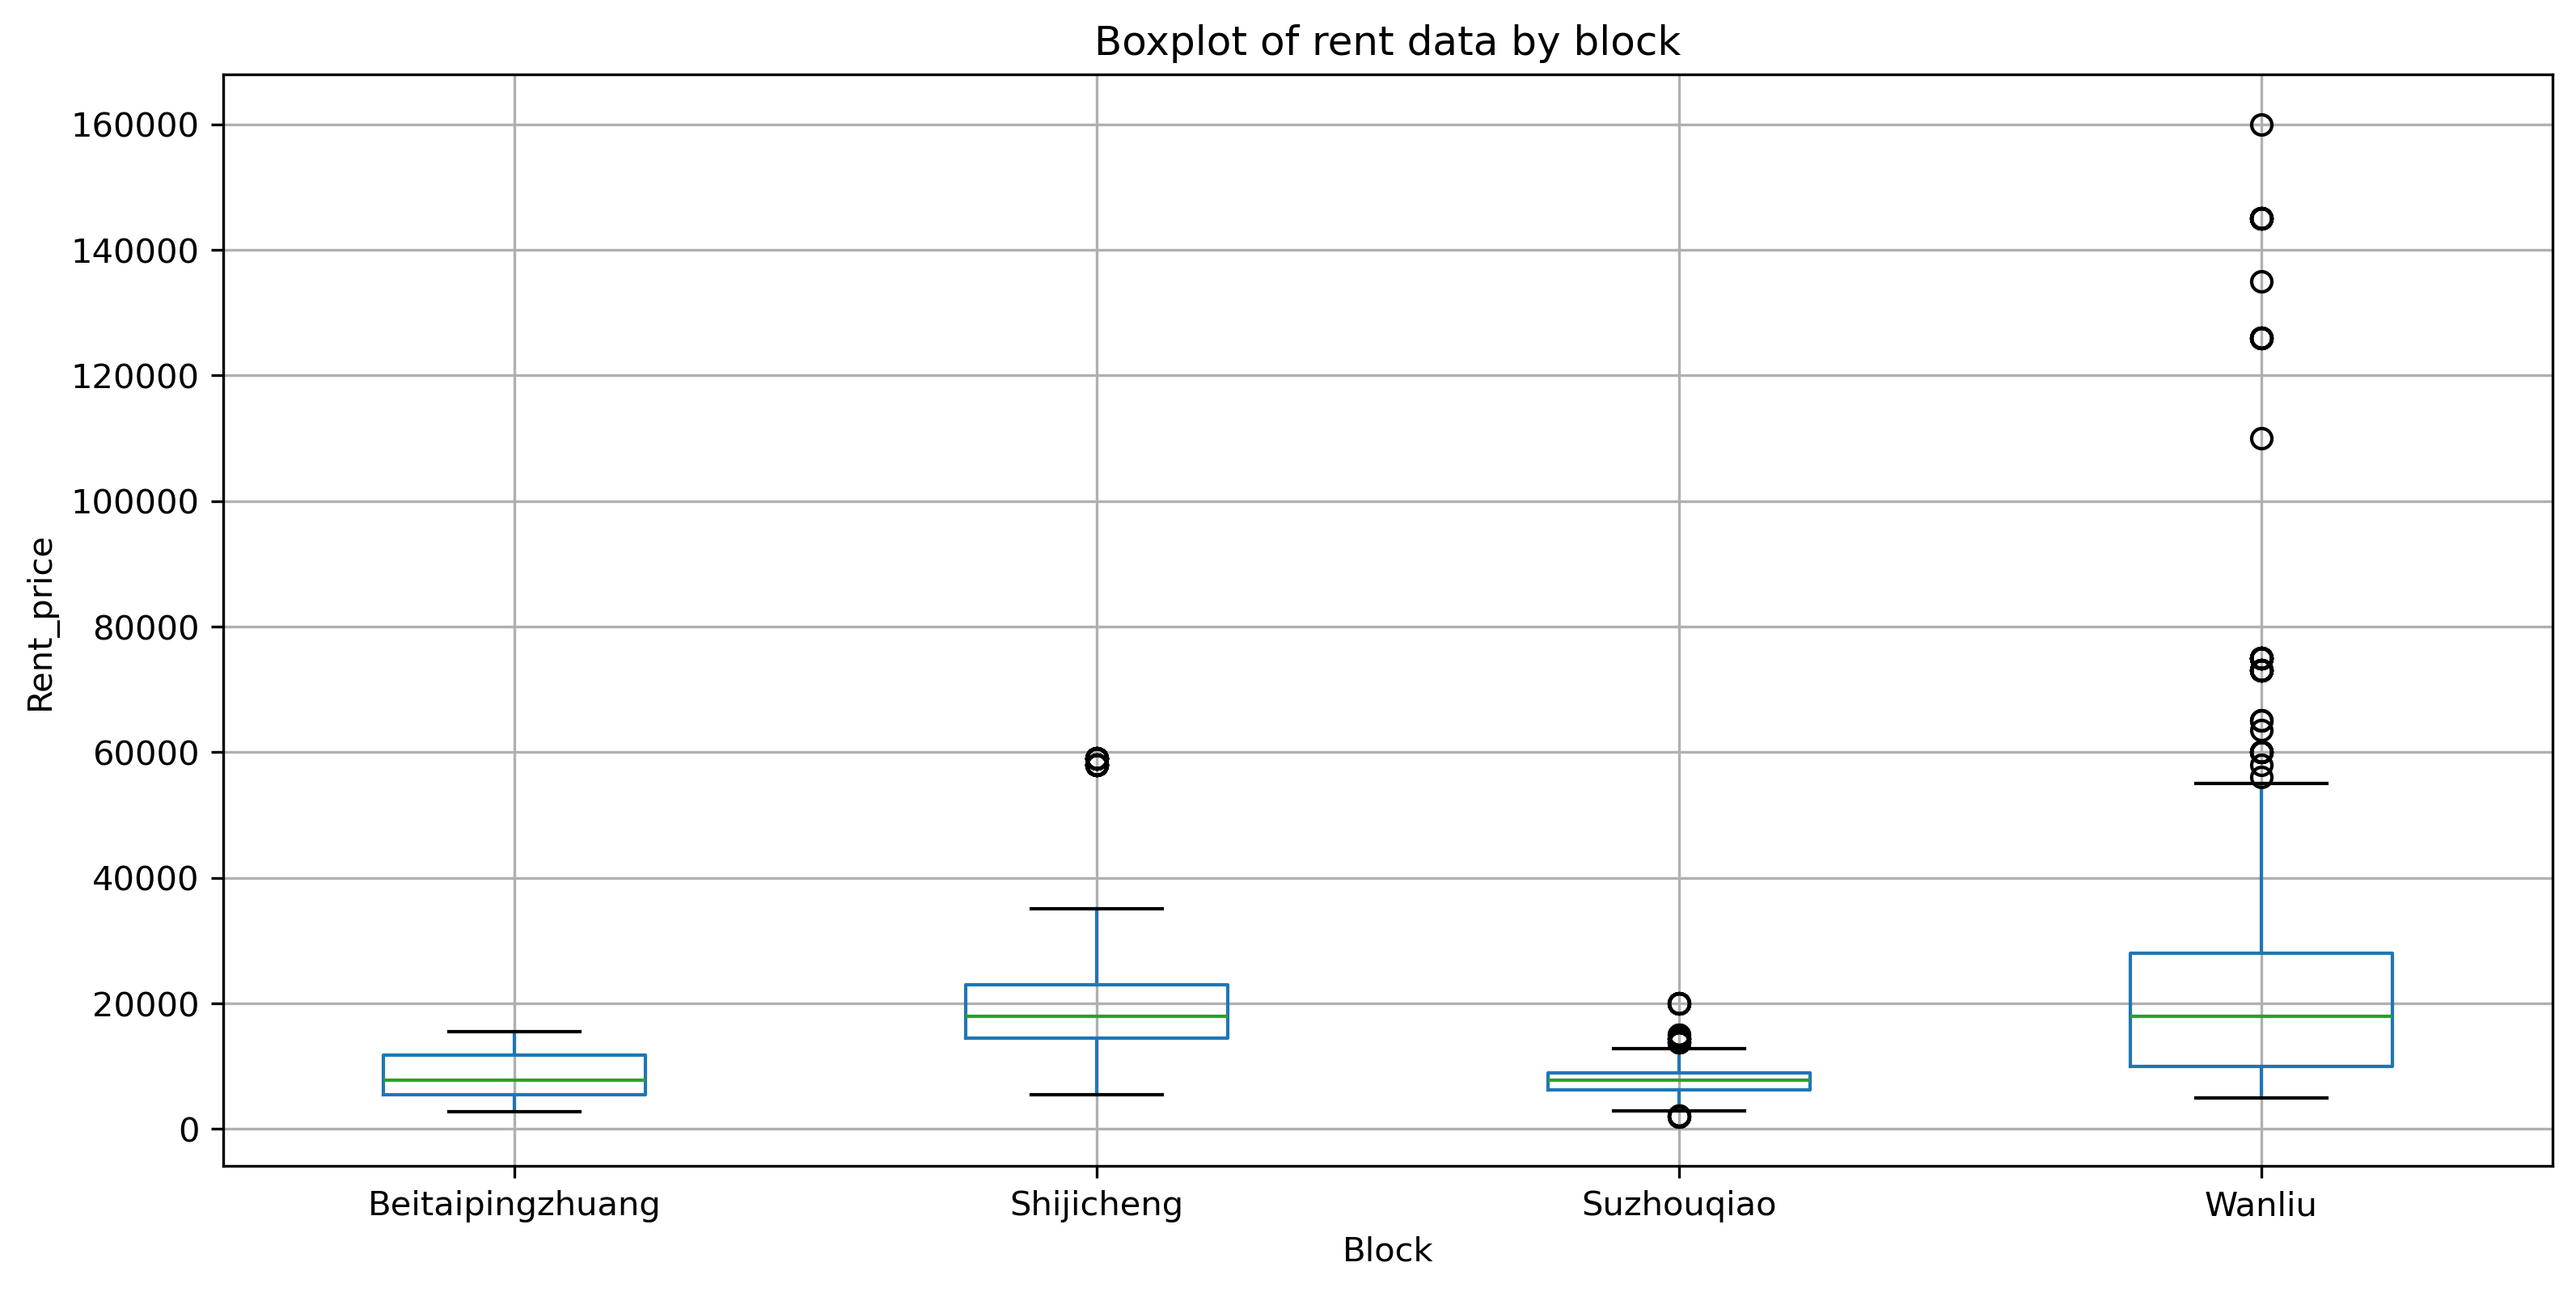

In [4]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 绘制售价数据的箱型图
fig, ax = plt.subplots(figsize=(12, 6))
house_data.boxplot(column='price/m2', by='location', ax=ax)
plt.title('Boxplot of house price data by block')
plt.xlabel('Block')
plt.ylabel('House price per square meter')
plt.suptitle('')
plt.show()

# 绘制租金数据的箱型图
fig, ax = plt.subplots(figsize=(12, 6))
rent_data.boxplot(column='rent_price', by='location', ax=ax)
plt.title('Boxplot of rent data by block')
plt.xlabel('Block')
plt.ylabel('Rent_price')
plt.suptitle('')
plt.show()

In [5]:
# 计算每平方米租金（租金/面积）
rent_data['rent_per_m2'] = rent_data['rent_price'] / rent_data['area']

# 计算每个街区的中位每平方米房价
median_house_price_per_m2 = grouped_house['price/m2'].median()
print("每个街区的中位每平方米房价:")
print(median_house_price_per_m2)
print("\n")

# 计算每个街区的中位每平方米租金
median_rent_per_m2 = grouped_rent['rent_per_m2'].median()
print("每个街区的中位每平方米租金:")
print(median_rent_per_m2)
print("\n")

# 计算每个街区中位每平方米房价和每平方米租金比率
ratios = median_house_price_per_m2 / median_rent_per_m2
print("每个街区中位每平方米房价和每平方米租金比率:")
print(ratios)
print("\n")

每个街区的中位每平方米房价:
location
Beitaipingzhuang     89461.5
Shijicheng          124553.0
Suzhouqiao           86713.0
Wanliu              145669.0
Name: price/m2, dtype: float64


每个街区的中位每平方米租金:
location
Beitaipingzhuang    142.201835
Shijicheng          114.906832
Suzhouqiao          133.333333
Wanliu              148.765274
Name: rent_per_m2, dtype: float64


每个街区中位每平方米房价和每平方米租金比率:
location
Beitaipingzhuang     629.116355
Shijicheng          1083.947730
Suzhouqiao           650.347500
Wanliu               979.186851
dtype: float64




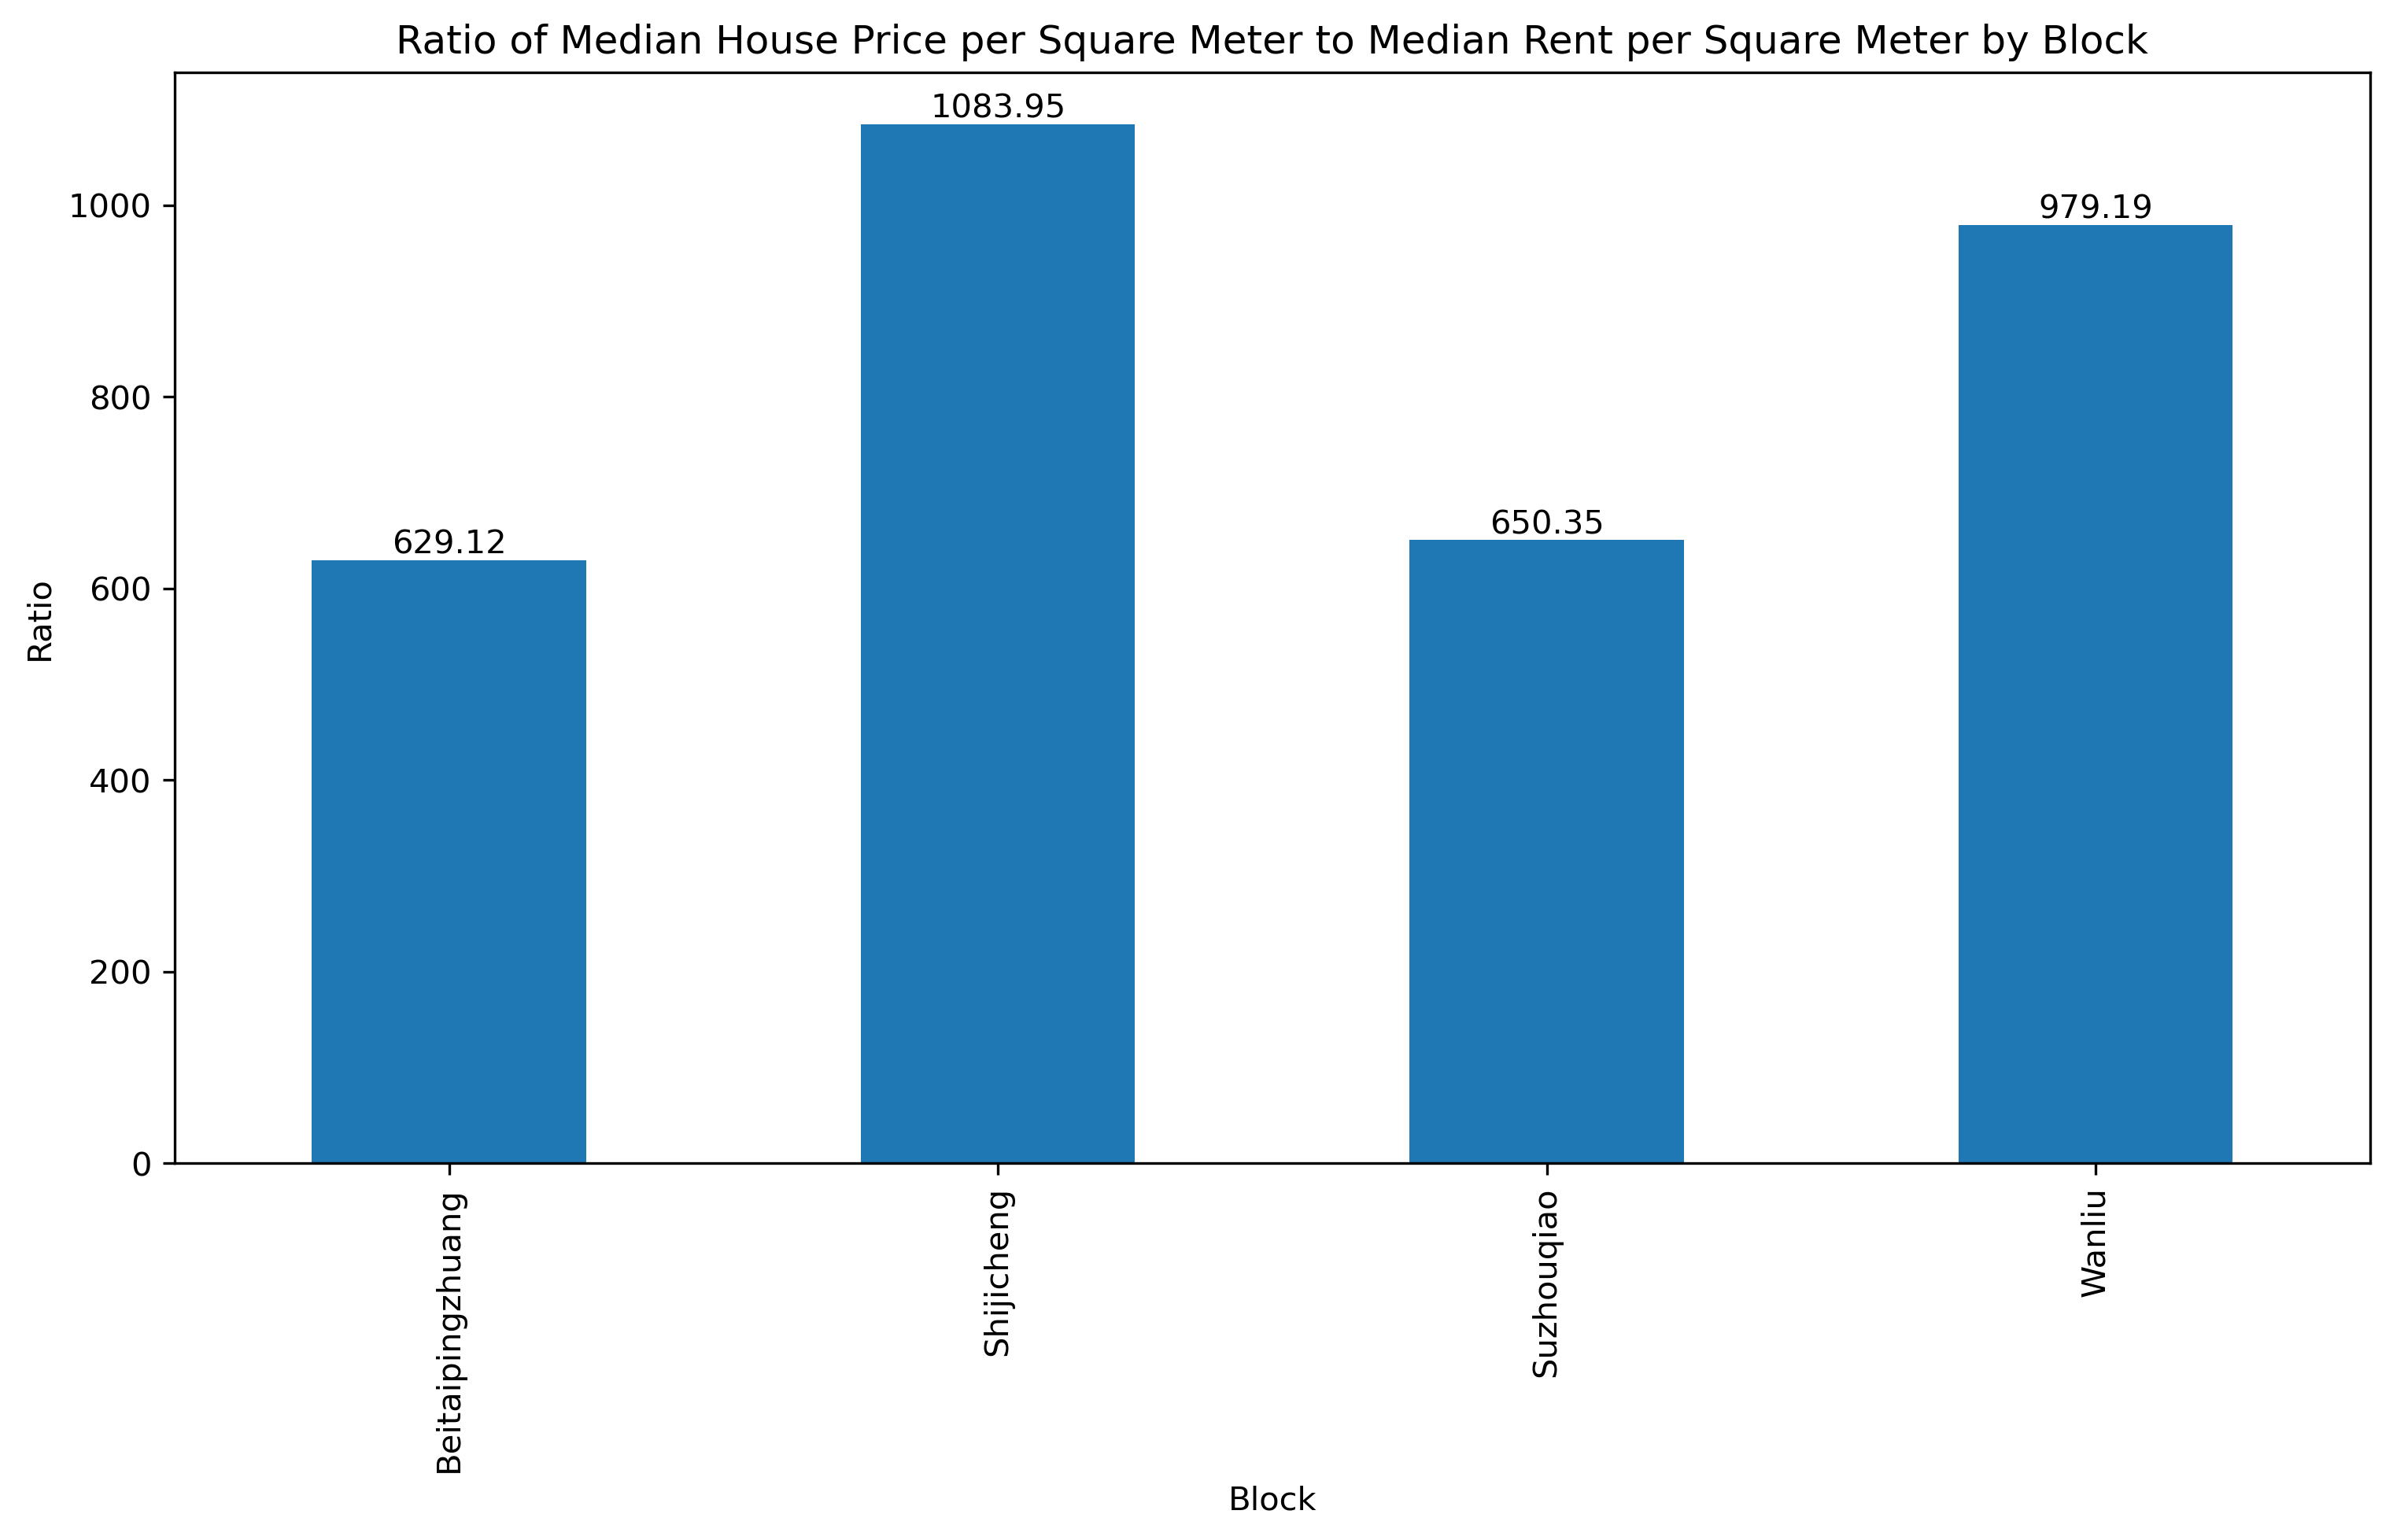

In [6]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 绘制条形图
fig, ax = plt.subplots(figsize=(12, 6))
bars = ratios.plot(kind='bar', ax=ax)
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
            ha='center', va='bottom')
plt.title('Ratio of Median House Price per Square Meter to Median Rent per Square Meter by Block')
plt.xlabel('Block')
plt.ylabel('Ratio')
plt.show()